* In this notebook, we will explore the effect of feature number on the R2, RMSE and MAE errors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# ERed_data=pd.read_csv(r"../Data/Reduction_potential_213BzNSN.csv")
# ERed_data=pd.read_csv(r"../Data/All_bzNSN_derivates_from_AL_and_DFT.csv",usecols=["SMILES","Ered(V)"])
ERed_data=pd.read_csv(r"C:\Users\jaina\Box\Machine_Learning_Chemistry\Data\filename_smi_multifnMPP_all_2763.csv")
# ERed_data=Ered_data.sample
ERed_data=ERed_data.sample(1500)
ERed_data.head()

,filename,Ered,Ered_ag,SMILES,MPP_all(Angstrom),MPP_heavy(Angstrom)
1711,E11_BzNSN_g16_sbo_neutral_BFremaing_p199,1.254293,-2.595707,CCOc1c2c(c(OC)c3nsnc13)N(C)CN2C,0.760816,0.438886
1061,86,1.480000,-2.370000,CCCCc1c2c(cc3nsnc13)CCC2C,0.812344,0.392227
844,421,1.790000,-2.060000,CC(C)C1C([O-])=[N+](C)c2c1ccc1nsnc21,0.687187,0.385923
2553,E11_BzNSN_g16_sbo_neutral_BFremaing_p1129,1.043762,-2.806238,CCN1CN(C(C)C)c2cc3nsnc3c(C)c21,0.974154,0.564845
2000,E11_BzNSN_g16_sbo_neutral_BFremaing_p514,1.301784,-2.548216,CCC(=O)Oc1c2c(c(CC)c3nsnc13)N(C)CN2C,0.808093,0.594895


In [5]:
print(f"Before: ERed_data.shape={ERed_data.shape}")
ERed_data=ERed_data.loc[ERed_data["SMILES"].drop_duplicates().index,:]
print(f"After: ERed_data.shape={ERed_data.shape}")

Before: ERed_data.shape=(1500, 6)
After: ERed_data.shape=(1500, 6)


# No duplicate SMILES found
- check again with mol descriptors
- SMILES string is not a unique representation of a molecule

In [6]:
isnd=np.arange(0,ERed_data.shape[0],1)
ERed_data.index=isnd
print(ERed_data.shape)
ERed_data.head()

(1500, 6)


,filename,Ered,Ered_ag,SMILES,MPP_all(Angstrom),MPP_heavy(Angstrom)
0,E11_BzNSN_g16_sbo_neutral_BFremaing_p199,1.254293,-2.595707,CCOc1c2c(c(OC)c3nsnc13)N(C)CN2C,0.760816,0.438886
1,86,1.480000,-2.370000,CCCCc1c2c(cc3nsnc13)CCC2C,0.812344,0.392227
2,421,1.790000,-2.060000,CC(C)C1C([O-])=[N+](C)c2c1ccc1nsnc21,0.687187,0.385923
3,E11_BzNSN_g16_sbo_neutral_BFremaing_p1129,1.043762,-2.806238,CCN1CN(C(C)C)c2cc3nsnc3c(C)c21,0.974154,0.564845
4,E11_BzNSN_g16_sbo_neutral_BFremaing_p514,1.301784,-2.548216,CCC(=O)Oc1c2c(c(CC)c3nsnc13)N(C)CN2C,0.808093,0.594895


* Feature Generation and Exploration

In [7]:
# 2D Mol. Descriptors
from rdkit.Chem import Descriptors
desc_list = [desc[0] for desc in Descriptors._descList]
# print(len(desc_list))
# print(desc_list)

In [8]:
from rdkit.Chem import rdMolDescriptors 
import rdkit.Chem as Chem

def smi_to_mol_prop(smi,property_names = list(rdMolDescriptors.Properties.GetAvailableProperties())):
    """
    This function will return a numpy array with all molecular properties of a SMILES string
    Input (smi): a SMILES string
    Output: np.array()
    eg. df['mol_prop'] = df.SMILES.apply(smi2molprop)
    output: each row of df['mol_prop'] will have a np.array with all molecular props.
    """
    property_getter = rdMolDescriptors.Properties(property_names)
    
    mol = Chem.MolFromSmiles(smi)
    props = None
    if mol:
        props = np.array(property_getter.ComputeProperties(mol))
    return props

In [9]:
properties=list(rdMolDescriptors.Properties.GetAvailableProperties())

In [10]:
#Generate descriptors for each molecule
from rdkit.ML.Descriptors import MoleculeDescriptors

calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)

rdkit_desc = [calc.CalcDescriptors(Chem.MolFromSmiles(x)) for x in ERed_data["SMILES"]]

In [11]:
df_2Ddescp = pd.DataFrame(rdkit_desc,columns=desc_list)
print(df_2Ddescp.shape)
# df_2Ddescp.head()

(1500, 208)


# Remove duplicate molecules
- SMILES string is not unique for a molecule, pandas might have missed some duplicate molecules at the start

In [12]:
print(f"Before: ERed_data.shape={ERed_data.shape}")
without_duplicate_mols=df_2Ddescp.drop_duplicates().index
ERed_data=ERed_data.loc[without_duplicate_mols,:]
ERed_data.index=np.arange(ERed_data.shape[0])
print(f"After: ERed_data.shape={ERed_data.shape}")

print(f"Before: df_2Ddescp.shape={df_2Ddescp.shape}")
df_2Ddescp=df_2Ddescp.loc[without_duplicate_mols,:]
df_2Ddescp.index=np.arange(df_2Ddescp.shape[0])
print(f"After: df_2Ddescp.shape={df_2Ddescp.shape}")

Before: ERed_data.shape=(1500, 6)
After: ERed_data.shape=(1500, 6)
Before: df_2Ddescp.shape=(1500, 208)
After: df_2Ddescp.shape=(1500, 208)


In [13]:
df_molprop=pd.DataFrame(ERed_data["SMILES"].apply(lambda x:smi_to_mol_prop(x,property_names=properties)).to_list(),columns=properties)

In [14]:
Xdata_btz=pd.concat([df_molprop,df_2Ddescp],axis=1)
print(Xdata_btz.shape)
Xdata_btz.head()

(1500, 251)


,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,280.099397,280.353,6.0,0.0,3.0,0.0,7.0,19.0,35.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,246.119070,246.379,2.0,0.0,3.0,0.0,3.0,17.0,35.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,247.077933,247.323,4.0,0.0,1.0,0.0,4.0,17.0,30.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,262.125218,262.382,4.0,0.0,2.0,0.0,5.0,18.0,36.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,306.115047,306.391,6.0,0.0,3.0,0.0,7.0,21.0,39.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Remove columns with all 0
print(f"Initial Xdata_btz shape = %d x %d" %Xdata_btz.shape)
Xdata_btz=Xdata_btz.drop(Xdata_btz.columns[Xdata_btz.eq(0).all()],axis=1)
print(f"Xdata_btz shape (now) = %d x %d" %Xdata_btz.shape)

Initial Xdata_btz shape = 1500 x 251
Xdata_btz shape (now) = 1500 x 168


In [16]:
# Remove duplicates
print(f"Initial Xdata_btz shape = %d x %d" %Xdata_btz.shape)
Xdata_btz=Xdata_btz.loc[:,~Xdata_btz.columns.duplicated()].copy()
print(f"Xdata_btz shape (now) = %d x %d" %Xdata_btz.shape)

Initial Xdata_btz shape = 1500 x 168
Xdata_btz shape (now) = 1500 x 160


In [17]:
all_desc=Xdata_btz.columns
print(len(all_desc))

160


# add more ringstats

In [18]:
def ring_stats(smiles):
    """
    if smi="CN1CN(C)c2cc3nsnc3cc21" 
    then ring_stats(smi) will return a list of number of rings of size [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    # rings start with size 3
    Output:    [0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0]
    molecule has 2 and 1 rings of size 5 and 6, respectively
    """
    m = Chem.MolFromSmiles(smiles)
    
    d=13 # rings won't have more than 13 atoms
    nring=[0]*d
    rings=m.GetRingInfo()
    for ring in rings.AtomRings():
        sr=""
        n=0
        for atom in ring:
            sr+=m.GetAtomWithIdx(atom).GetSymbol()
            n+=1

        if(n<d):
            nring[n]+=1 # total rings
    return nring    

In [19]:
def hetroring_stats(smiles):
    """
    Retrun a list of number of hetrocylces of sizes from 3 to 13

    Eg. if smi="CN1CN(C)c2cc3nsnc3cc21" 
    # rings start with size 3
    then the hetroring_stats(smi) will return :  hetrocycle ring of size [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    Output: [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
    There are 2 hetrorings of size 5
    """
    m = Chem.MolFromSmiles(smiles)
    
    d=13 # rings won't have more than 13 atoms
    nHring=[0]*d
    
    rings=m.GetRingInfo()
    for ring in rings.AtomRings():
        sr=""
        n=0
        for atom in ring:
            sr+=m.GetAtomWithIdx(atom).GetSymbol()
            n+=1

        if(n<d):
            c=sr.count('C')
            if(c<n): # hetro-atom cycle
                nHring[n]+=1
    return nHring    

In [20]:
def other_ring_stats(smiles):
    """
    Return a list which contains [number of carbon atoms (nC) in all homocycles, nC in all heterocycles,nN in all hetrocycle, nS in all hetrocycles, nO in all hetrocycles ]
    """
    m = Chem.MolFromSmiles(smiles)
    
    numH_C,numH_N,numH_S,numH_O=0,0,0,0
    num_C_homo=0
    ri=m.GetRingInfo()
    
    for r in ri.AtomRings():
        sr=""
        ringsize=0
        for i in r:
            sr+=m.GetAtomWithIdx(i).GetSymbol()
            ringsize+=1
        # print(sr)
        num_c=sr.count('C')
        
        # count number of S, N, C, and O in hetrocycles
        if  num_c < ringsize: # count in hetrocycles
            numH_C+=num_c
            numH_N+=sr.count('N')
            numH_S+=sr.count('S')
            numH_O+=sr.count('O')
        else:
            num_C_homo+=ringsize
    return [num_C_homo,numH_C,numH_N,numH_O,numH_S]

In [21]:
new_RingD=ERed_data["SMILES"].apply(lambda smi:other_ring_stats(smi)).to_list()
col_txt=["nhomo_C","nhetro_C","nhetro_N","nhetro_O","nhetro_S"]
df_ringD=pd.DataFrame(new_RingD,columns=col_txt)
df_ringD=df_ringD.drop(df_ringD.columns[df_ringD.eq(0).all()],axis=1)

In [22]:
new_RingD=ERed_data["SMILES"].apply(lambda smi:ring_stats(smi)).to_list()
col_txt=["nring"+str(i) for i in range(len(new_RingD[0]))]

df_ring=pd.DataFrame(new_RingD,columns=col_txt)
df_ring=df_ring.drop(df_ring.columns[df_ring.eq(0).all()],axis=1)

In [23]:
new_RingD=ERed_data["SMILES"].apply(lambda smi:hetroring_stats(smi)).to_list()
col_txt=["nHring"+str(i) for i in range(len(new_RingD[0]))]

df_ringh=pd.DataFrame(new_RingD,columns=col_txt)
df_ringh=df_ringh.drop(df_ringh.columns[df_ringh.eq(0).all()],axis=1)

In [24]:
def substruct_in_smi(mol_smi_str,pat_smi_str):
    """
    This function will return True if the substructure (pattern) is present in the SMILES string.
    Input: smi_str = A SMILES string;   sub_str = Pattern 
    Output: True (substruture found in the smi); False (substruture not found in the smi)
    """   
    mol = Chem.MolFromSmiles(mol_smi_str)
    pat = Chem.MolFromSmiles(pat_smi_str) 

    return mol.HasSubstructMatch(pat)

In [25]:
newclass=ERed_data["SMILES"].apply(lambda x:1*substruct_in_smi(mol_smi_str=x,pat_smi_str="c1c2c(cc3nsnc13)N(C)CN2C"))
df_class=pd.DataFrame(newclass.to_list(),columns=["Scaffold"])

In [26]:
ERed_data.head()

,filename,Ered,Ered_ag,SMILES,MPP_all(Angstrom),MPP_heavy(Angstrom)
0,E11_BzNSN_g16_sbo_neutral_BFremaing_p199,1.254293,-2.595707,CCOc1c2c(c(OC)c3nsnc13)N(C)CN2C,0.760816,0.438886
1,86,1.480000,-2.370000,CCCCc1c2c(cc3nsnc13)CCC2C,0.812344,0.392227
2,421,1.790000,-2.060000,CC(C)C1C([O-])=[N+](C)c2c1ccc1nsnc21,0.687187,0.385923
3,E11_BzNSN_g16_sbo_neutral_BFremaing_p1129,1.043762,-2.806238,CCN1CN(C(C)C)c2cc3nsnc3c(C)c21,0.974154,0.564845
4,E11_BzNSN_g16_sbo_neutral_BFremaing_p514,1.301784,-2.548216,CCC(=O)Oc1c2c(c(CC)c3nsnc13)N(C)CN2C,0.808093,0.594895


In [27]:
Xdata_btz_corr_scaffold_rings=pd.concat([Xdata_btz,df_ring,df_ringh,df_ringD,df_class,ERed_data.drop(columns=["Ered","filename","SMILES","Ered_ag"])],axis=1)
Xdata_btz_corr_scaffold_rings

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,nHring7,nHring8,nhomo_C,nhetro_C,nhetro_N,nhetro_O,nhetro_S,Scaffold,MPP_all(Angstrom),MPP_heavy(Angstrom)
0,280.099397,280.353,6.0,0.0,3.0,0.0,7.0,19.0,35.0,7.0,...,0,0,6,5,4,0,1,1,0.760816,0.438886
1,246.119070,246.379,2.0,0.0,3.0,0.0,3.0,17.0,35.0,3.0,...,0,0,11,2,2,0,1,0,0.812344,0.392227
2,247.077933,247.323,4.0,0.0,1.0,0.0,4.0,17.0,30.0,5.0,...,0,0,6,6,3,0,1,0,0.687187,0.385923
3,262.125218,262.382,4.0,0.0,2.0,0.0,5.0,18.0,36.0,5.0,...,0,0,6,5,4,0,1,1,0.974154,0.564845
4,306.115047,306.391,6.0,0.0,3.0,0.0,7.0,21.0,39.0,7.0,...,0,0,6,5,4,0,1,1,0.808093,0.594895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,291.115381,291.380,6.0,1.0,2.0,1.0,6.0,20.0,37.0,7.0,...,0,0,6,6,4,0,1,0,0.859299,0.478318
1496,292.135782,292.408,5.0,0.0,5.0,0.0,6.0,20.0,40.0,6.0,...,0,0,6,5,4,0,1,1,0.919853,0.550848
1497,318.187818,318.490,4.0,0.0,6.0,0.0,5.0,22.0,48.0,5.0,...,0,0,6,5,4,0,1,1,1.243054,0.978145
1498,236.061949,236.296,4.0,0.0,1.0,0.0,5.0,16.0,28.0,5.0,...,0,0,6,6,2,2,1,0,0.607866,0.207478


In [28]:
Xdata_btz_corr_scaffold_rings.shape

(1500, 176)

# Drop columns with identical values

In [29]:
Xdata_btz_corr_scaffold_rings=Xdata_btz_corr_scaffold_rings.loc[:,Xdata_btz_corr_scaffold_rings.nunique()>1]

In [30]:
Xdata_btz_corr_scaffold_rings.shape

(1500, 167)

In [31]:
def remove_corr_features(Xdata,corr_cutoff = 0.75):
    """
    This function will drop highly correlated features
    Output: a pd.Dataframe 
    """
    cor_matrix=Xdata.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))

    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_cutoff)]
    print(f"Dropped %d features with correlation coeff. > %0.2f" %(len(to_drop),corr_cutoff))

    Xdata=Xdata.drop(columns=to_drop,axis=1)
    print(f"Remaining features %d" %(Xdata.shape[1]))
    return Xdata

In [32]:
Xdata_btz_uncorr=remove_corr_features(Xdata=Xdata_btz_corr_scaffold_rings, corr_cutoff=0.8)
print(Xdata_btz_uncorr.shape)

Dropped 107 features with correlation coeff. > 0.80
Remaining features 60
(1500, 60)


In [33]:
Xdata_btz_uncorr

,exactmw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumRings,NumSaturatedRings,NumHeterocycles,NumAtomStereoCenters,tpsa,CrippenClogP,...,fr_methoxy,fr_unbrch_alkane,nring5,nring6,nring7,nring8,nHring5,nHring6,nhetro_O,MPP_all(Angstrom)
0,280.099397,6.0,0.0,3.0,3.0,0.0,2.0,0.0,50.72,1.94210,...,1,0,2,1,0,0,2,0,0,0.760816
1,246.119070,2.0,0.0,3.0,3.0,0.0,1.0,1.0,25.78,4.08360,...,0,0,2,1,0,0,1,0,0,0.812344
2,247.077933,4.0,0.0,1.0,3.0,0.0,2.0,1.0,51.85,1.47710,...,0,0,2,1,0,0,2,0,0,0.687187
3,262.125218,4.0,0.0,2.0,3.0,0.0,2.0,0.0,32.26,3.01192,...,0,0,2,1,0,0,2,0,0,0.974154
4,306.115047,6.0,0.0,3.0,3.0,0.0,2.0,0.0,58.56,2.41260,...,0,0,2,1,0,0,2,0,0,0.808093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,291.115381,6.0,1.0,2.0,3.0,0.0,2.0,0.0,69.29,-0.54180,...,0,0,1,2,0,0,1,1,0,0.859299
1496,292.135782,5.0,0.0,5.0,3.0,0.0,2.0,0.0,41.49,2.72010,...,0,1,2,1,0,0,2,0,0,0.919853
1497,318.187818,4.0,0.0,6.0,3.0,0.0,2.0,0.0,32.26,4.22000,...,0,0,2,1,0,0,2,0,0,1.243054
1498,236.061949,4.0,0.0,1.0,3.0,0.0,2.0,1.0,44.24,2.48710,...,0,0,1,2,0,0,1,1,2,0.607866


# ERed and Feauture correlation

In [34]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [35]:
target = 'Ered_ag'
descriptors=Xdata_btz_uncorr.columns
corr_ered_feat=[]

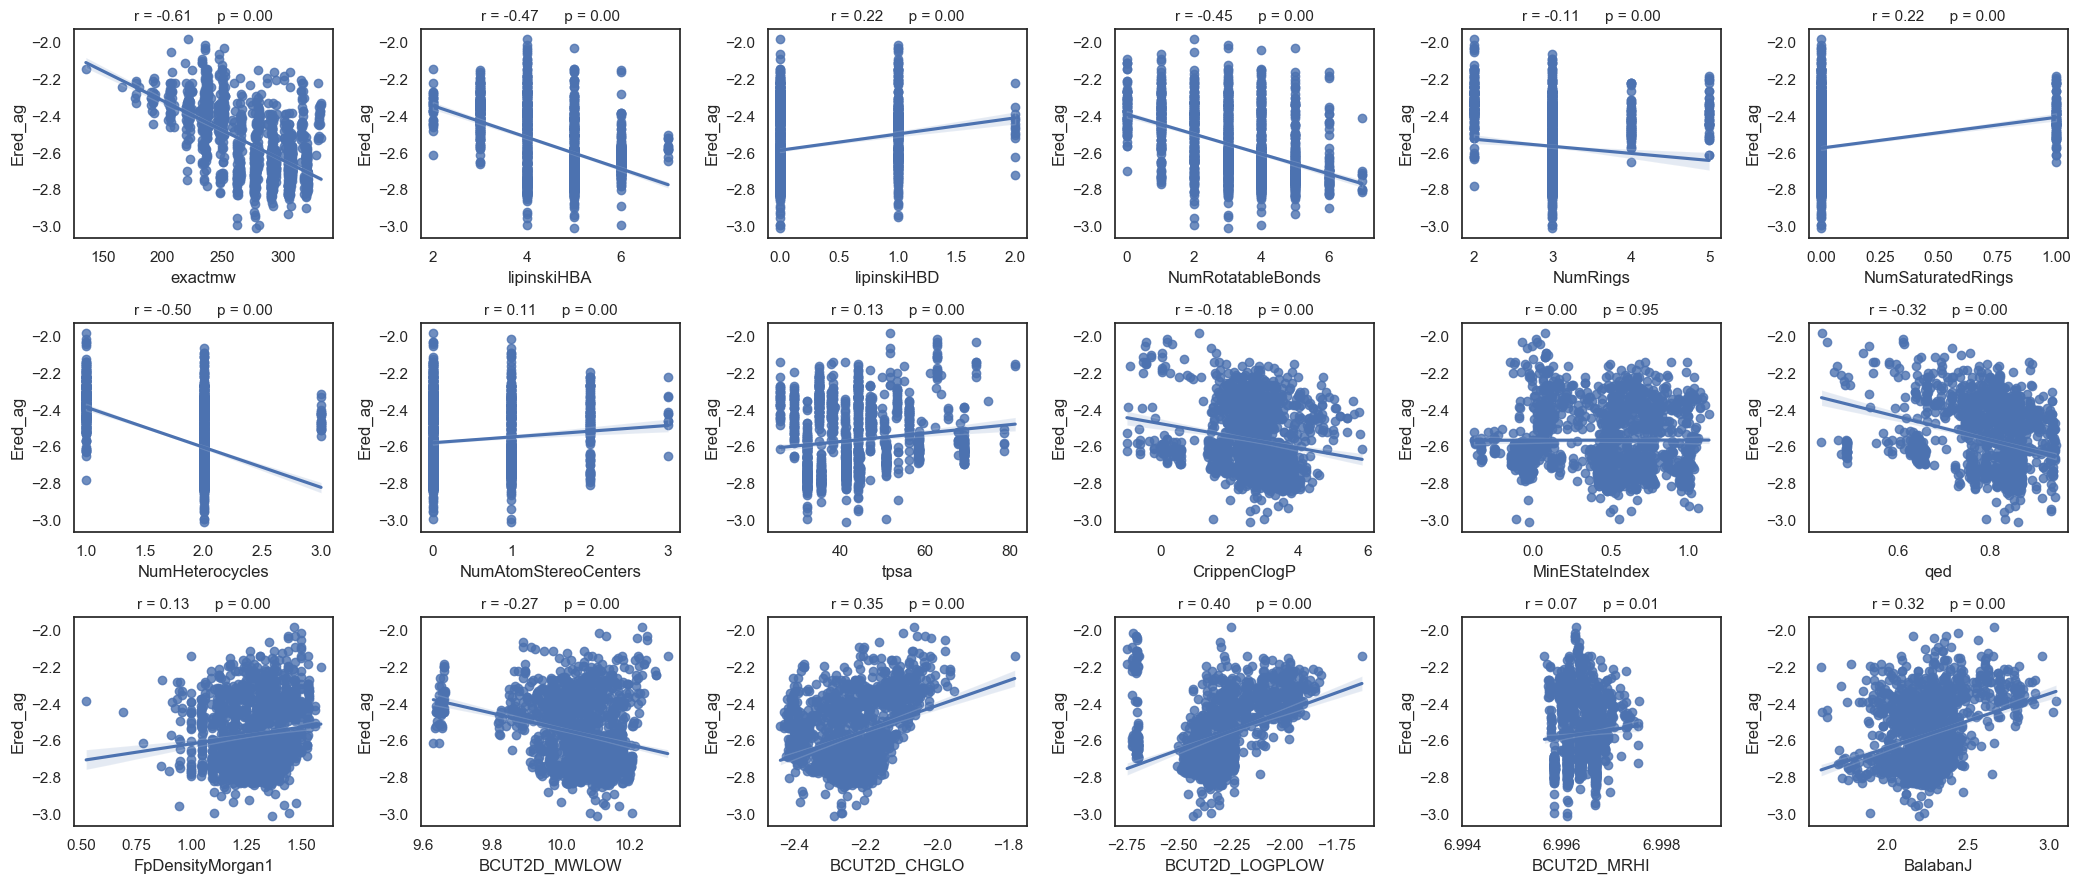

In [36]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

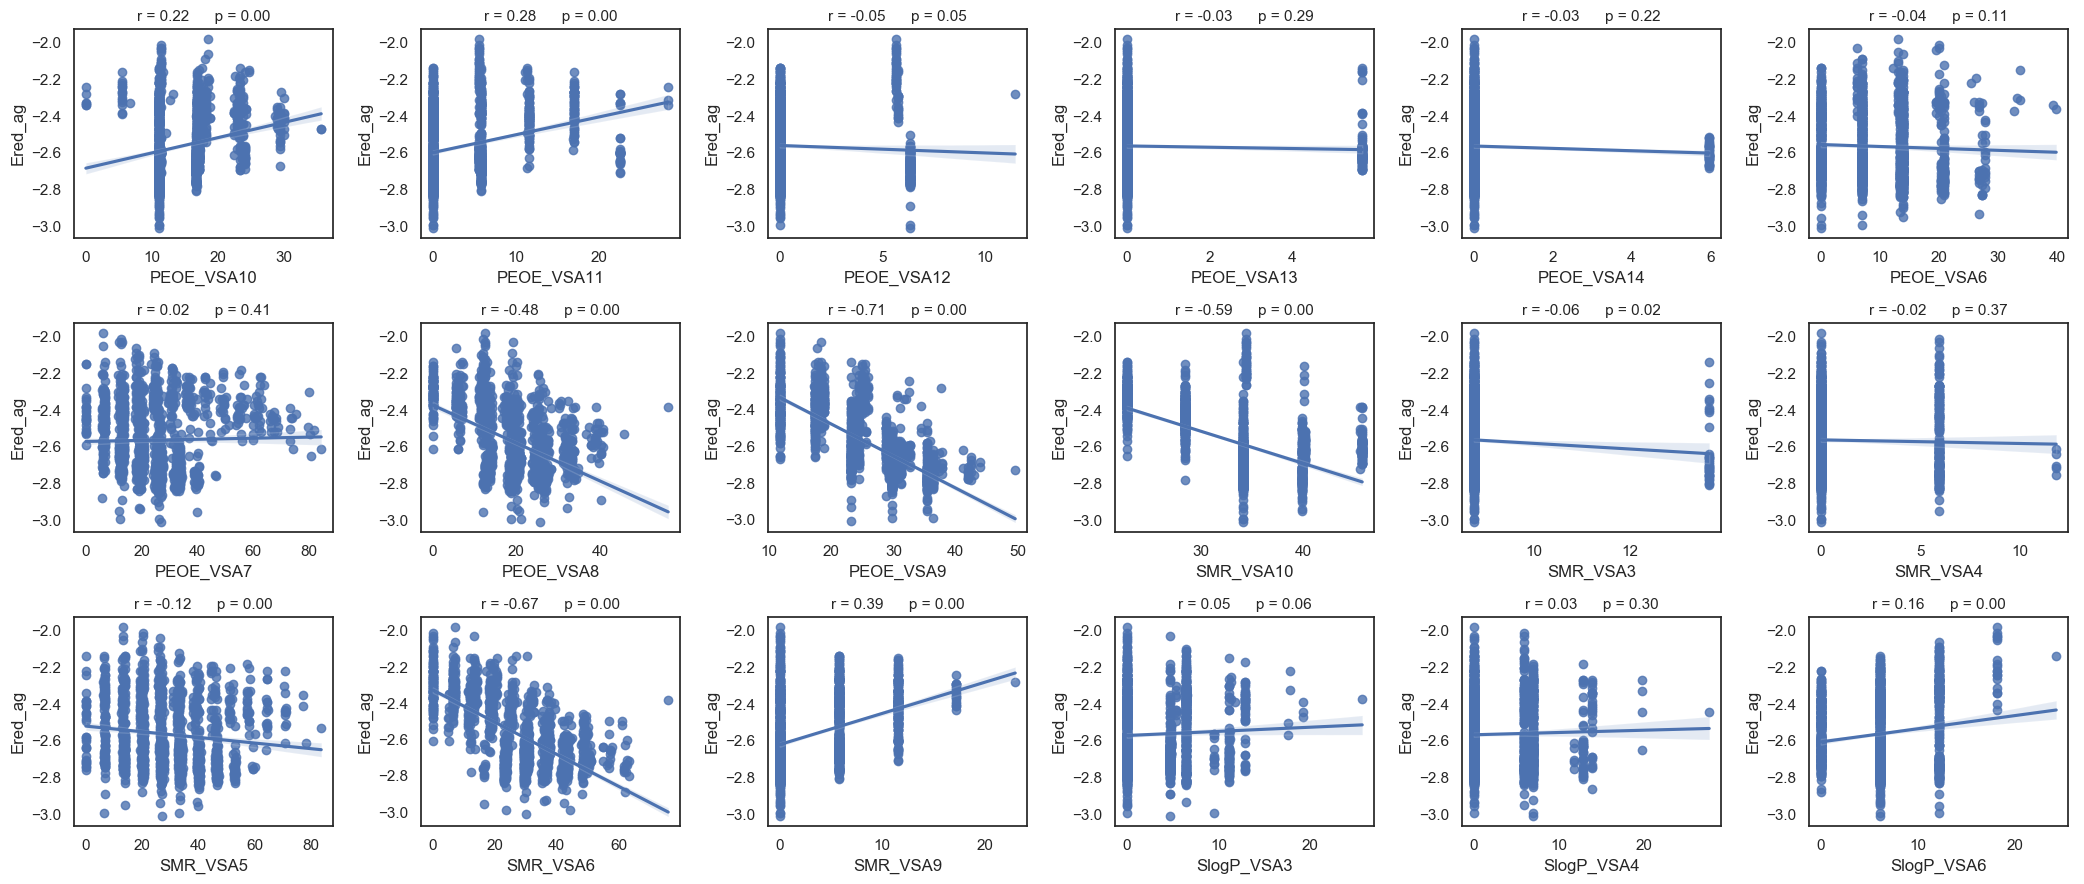

In [37]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

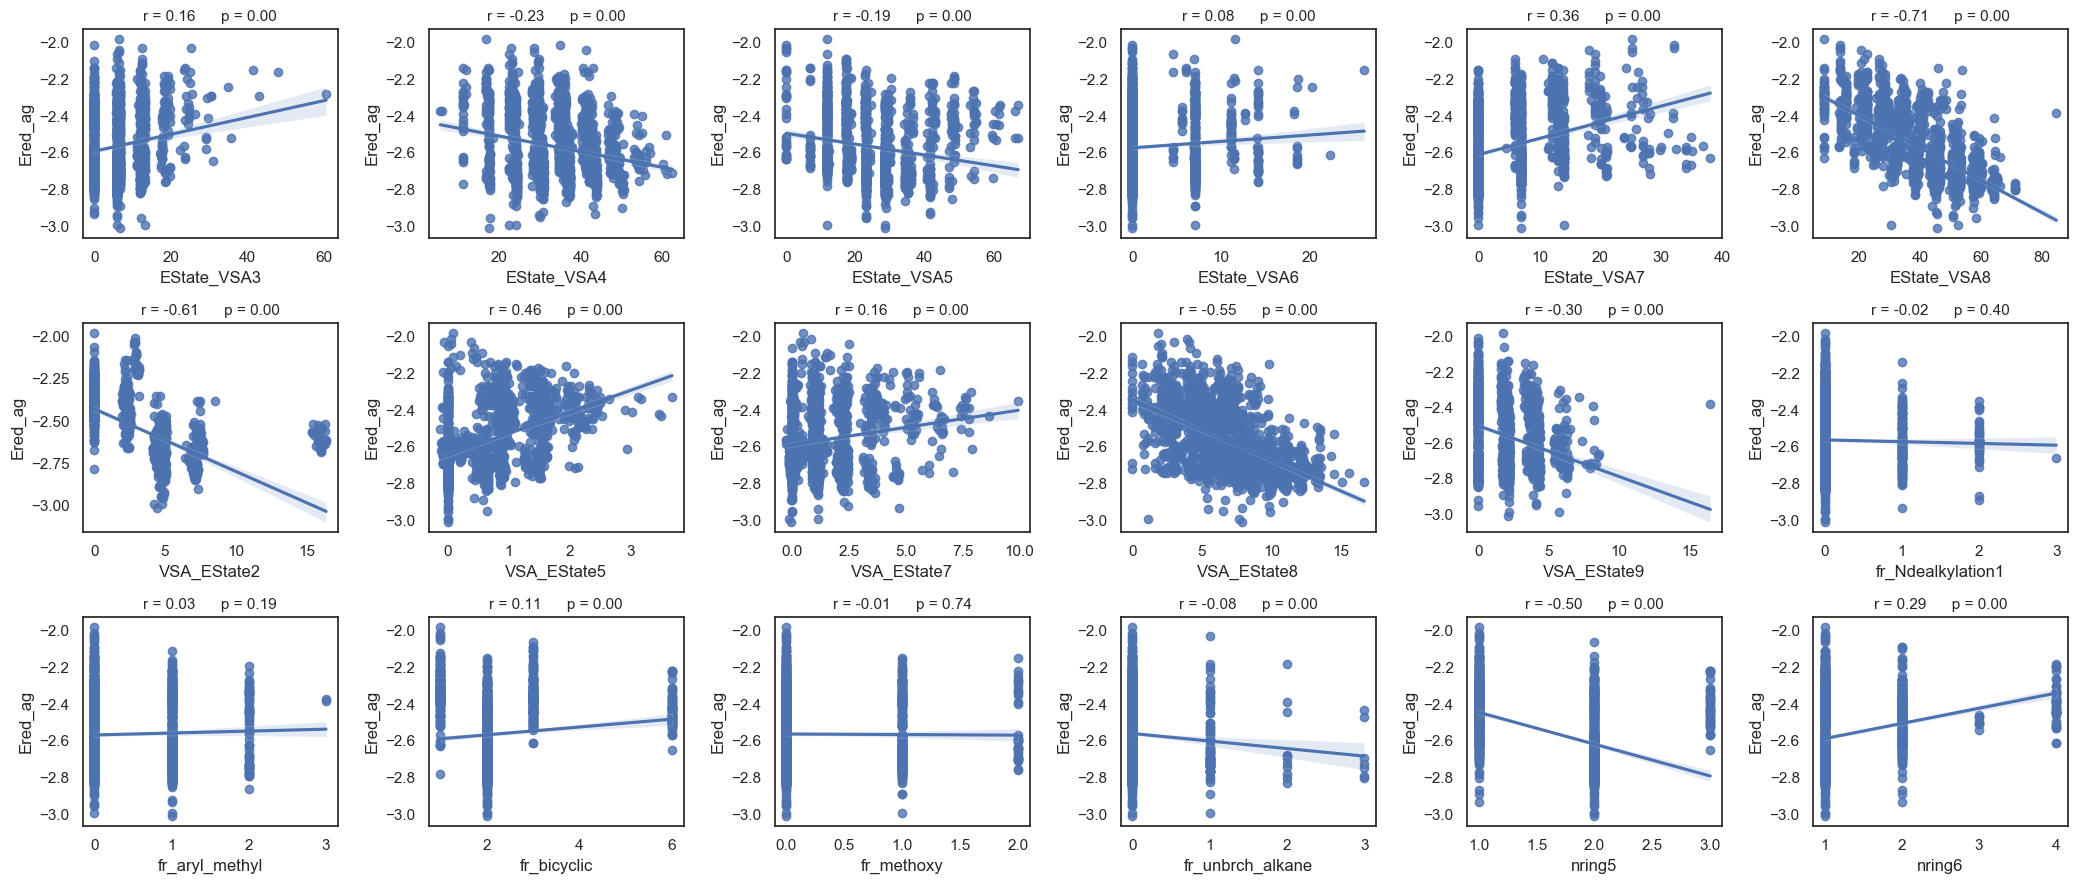

In [38]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

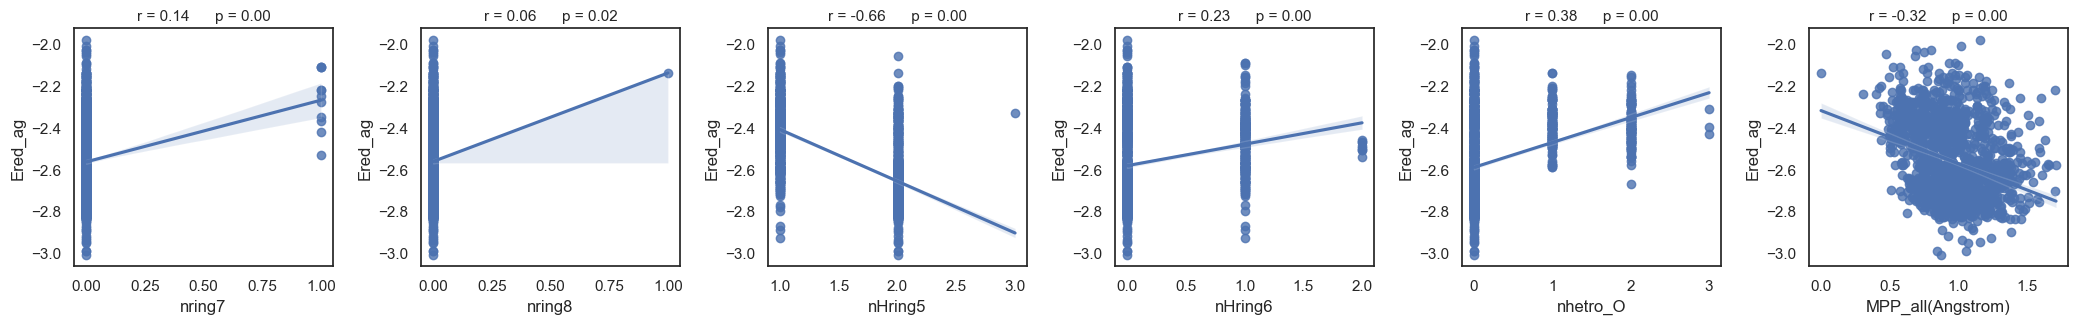

In [39]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18+18
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

In [40]:
Xdata_btz_uncorr.columns

Index(['exactmw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds',
       'NumRings', 'NumSaturatedRings', 'NumHeterocycles',
       'NumAtomStereoCenters', 'tpsa', 'CrippenClogP', 'MinEStateIndex', 'qed',
       'FpDensityMorgan1', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO', 'BCUT2D_LOGPLOW',
       'BCUT2D_MRHI', 'BalabanJ', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
       'PEOE_VSA9', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5',
       'SMR_VSA6', 'SMR_VSA9', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA6',
       'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6',
       'EState_VSA7', 'EState_VSA8', 'VSA_EState2', 'VSA_EState5',
       'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Ndealkylation1',
       'fr_aryl_methyl', 'fr_bicyclic', 'fr_methoxy', 'fr_unbrch_alkane',
       'nring5', 'nring6', 'nring7', 'nring8', 'nHring5', 'nHring6',
       'nhetro_O', 'MPP_all(Angstrom)'],
      dtype='object')

In [41]:
corr_ered_feat=pd.DataFrame(corr_ered_feat,columns=["Descriptors","Pearsons"])

remove_desc2=[i for i,desc in enumerate(corr_ered_feat["Descriptors"]) if type(desc) is int]
corr_ered_feat=corr_ered_feat.drop(remove_desc2)
corr_ered_feat_sorted=corr_ered_feat.dropna(axis=0).sort_values("Pearsons")

# Select most dominant features

In [42]:
df_reducedDescp=pd.concat([corr_ered_feat_sorted[:15],corr_ered_feat_sorted[-15:]])

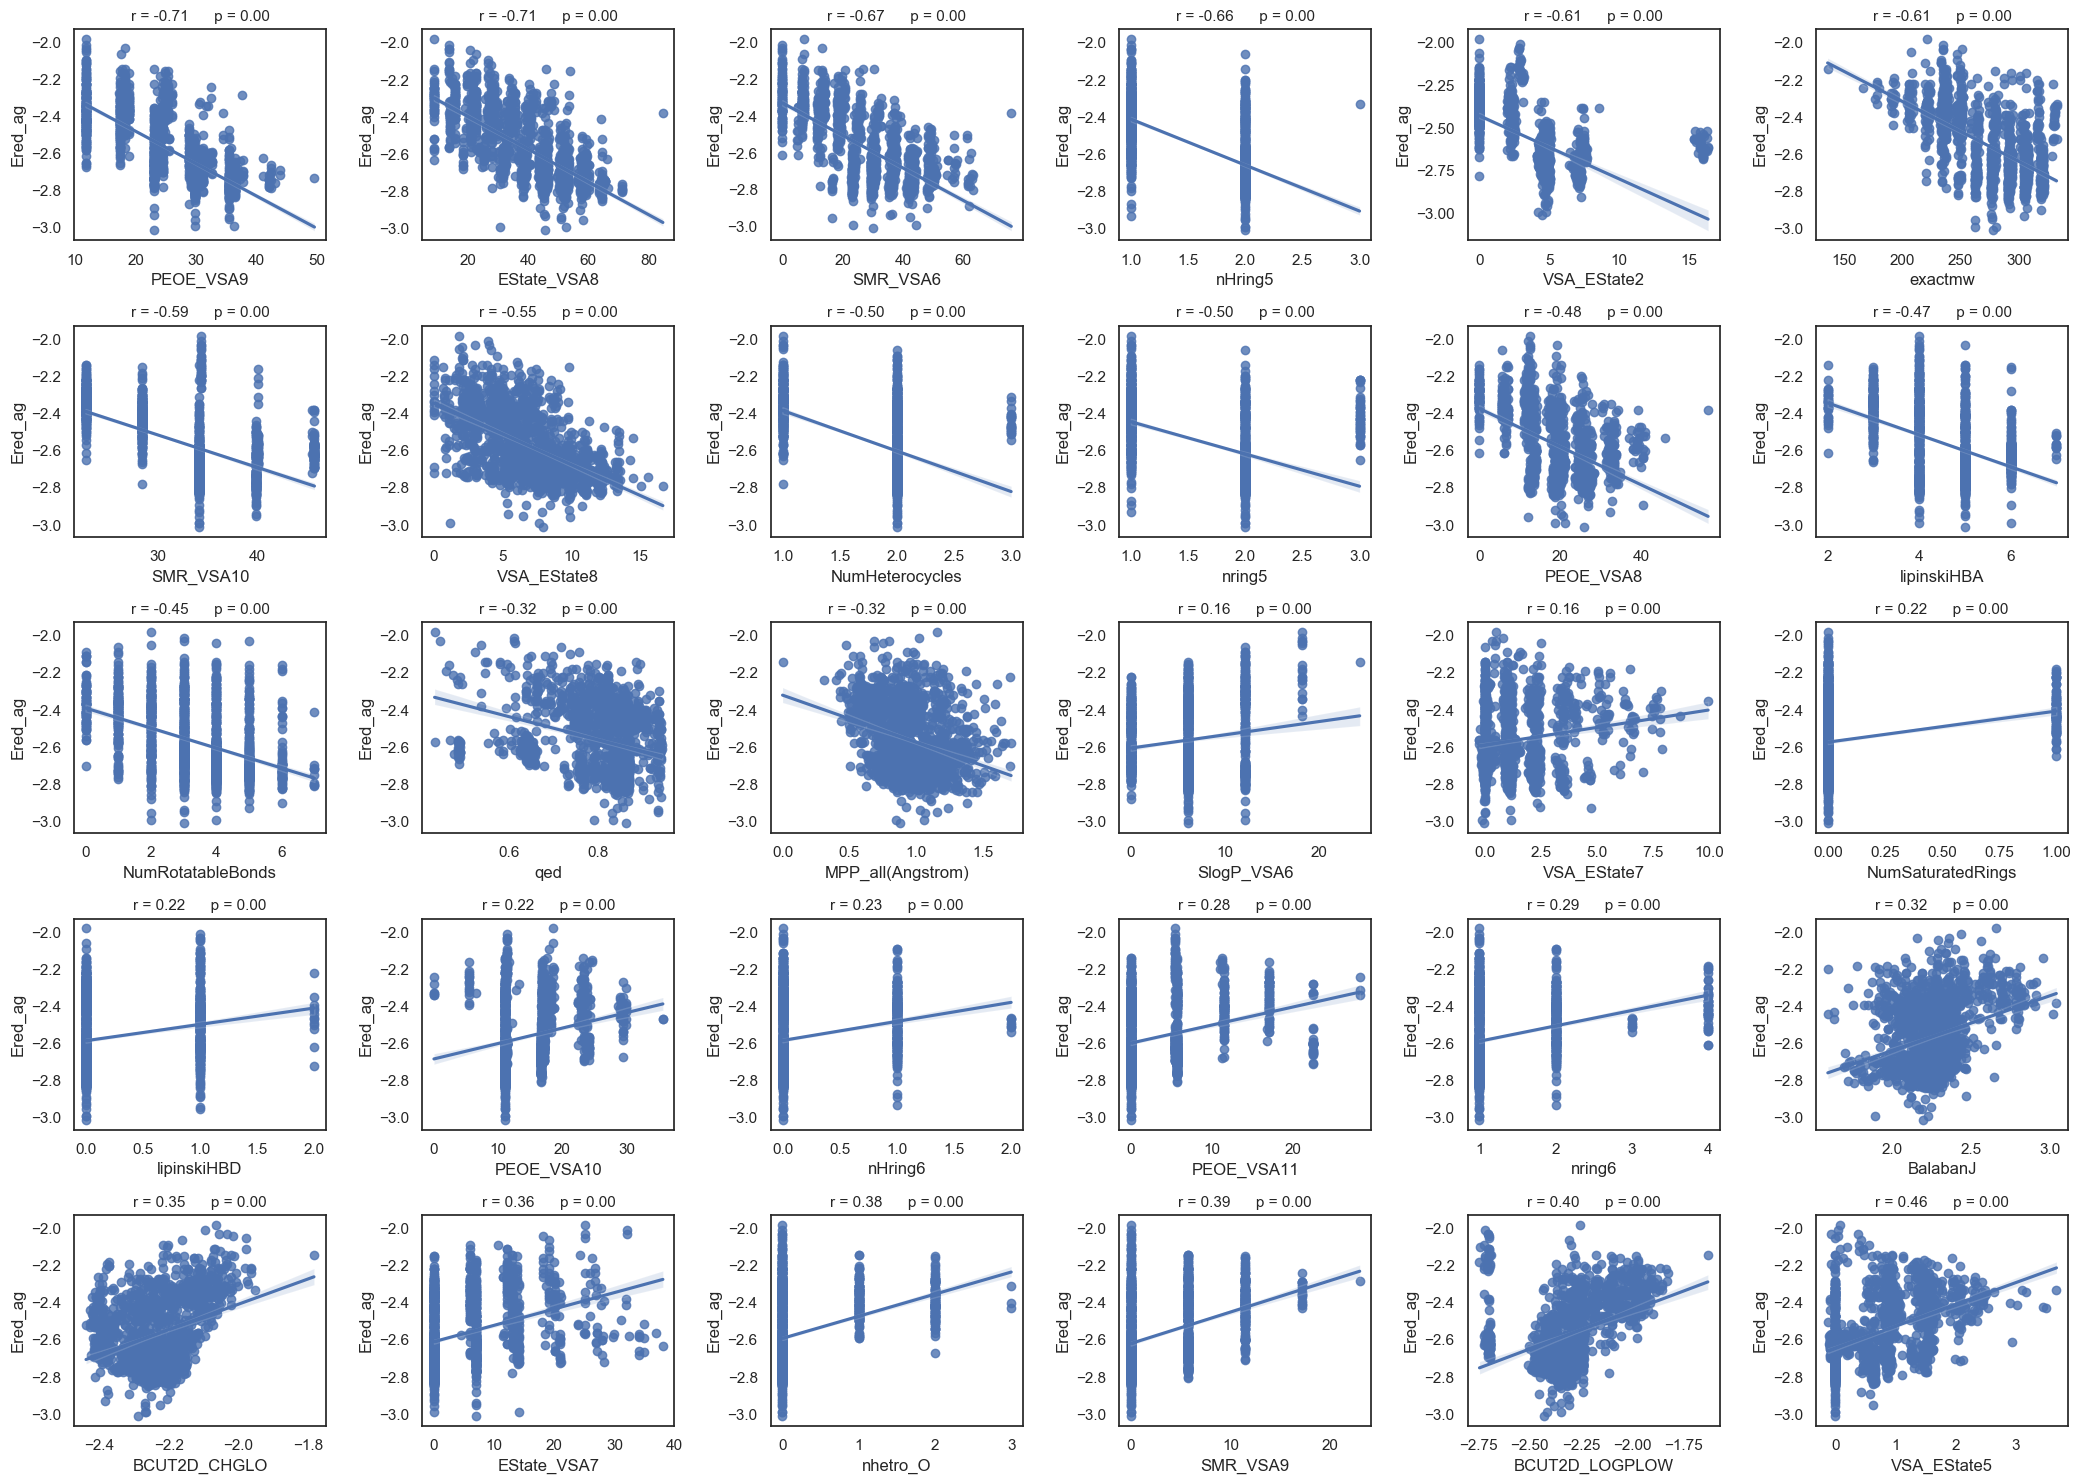

In [43]:
target = 'Ered_ag'
descriptors=df_reducedDescp.Descriptors.to_list()

nr_rows = 5
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):

            # print(i,descriptors[i])
            sns.regplot(x=Xdata_btz_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_btz_uncorr[descriptors[i]], ERed_data[target])
            # corr_ered_feat.append([descriptors[i],stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            corr_ered_feat.append([descriptors[i],stp[0]])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
# plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

# Remove Outliers with local outlier factor algorithm (LOC). Unsupervised Algo

In [44]:
Xdata_btz_uncorr_clean=Xdata_btz_uncorr.loc[:,df_reducedDescp["Descriptors"].to_list()]

In [45]:
X=Xdata_btz_uncorr_clean
Y=ERed_data["Ered_ag"]
print(f"X.shape={X.shape},Y.shape={Y.shape}")

X.shape=(1500, 30),Y.shape=(1500,)


# Find outliers with IQR

In [46]:
#Xdata_btz_uncorr_clean
q1_btz=ERed_data["Ered_ag"].quantile(0.25)
q3_btz=ERed_data["Ered_ag"].quantile(0.75)
IQR_btz=q3_btz-q1_btz
low_lim,up_lim=q1_btz-1.5*IQR_btz,q3_btz+1.5*IQR_btz
print(f"btz Q1={q1_btz:0.2f}, Q3={q3_btz:0.2f}, IQR={IQR_btz:0.2f}, low_lim={low_lim:0.2f}, up_lim={up_lim:0.2f}")
df_btz_outlier_iqr = ERed_data[(ERed_data["Ered_ag"] < low_lim)|(ERed_data["Ered_ag"] > up_lim)]
print(f"df_btz_outlier_iqr.shape={df_btz_outlier_iqr.shape}")

btz Q1=-2.71, Q3=-2.41, IQR=0.30, low_lim=-3.16, up_lim=-1.96
df_btz_outlier_iqr.shape=(0, 6)


# No outliers found

# Check model performance

In [47]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C ,WhiteKernel as Wht,Matern as matk

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


import torch, gpytorch
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

# Machine learning-realated functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For normalizing inputs
from sklearn.decomposition import PCA # Principle component analysis

In [48]:
def gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1,verbose=False):
    
    """
    Gaussian Process Regression implementation with the GPyTorch
    
    Input: gpregression_pytorch(X_train,y_train,num_iter,learning_rate)
    
    Retrun: trained_model, trained_likelihood

    """
    # nfeatures=X_train.shape[1]
    train_x=torch.from_numpy(np.array(X_train))
    train_y=torch.from_numpy(np.array(y_train))
    torch.set_default_dtype(torch.float64)

    # We will use the simplest form of GP model, exact inference
    class ExactGPModel(gpytorch.models.ExactGP):

        def __init__(self, train_x, train_y, likelihood):
            super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
            self.mean_module = gpytorch.means.ConstantMean()
 
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=1.5))
        
        def forward(self, x):
            mean_x = self.mean_module(x)
            covar_x = self.covar_module(x)
            return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

    # initialize likelihood and model
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    # this is for running the notebook in our testing framework
    import os
    smoke_test = ('CI' in os.environ)
    training_iter = 2 if smoke_test else num_iter


    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer # for hyperparameter tuning
    optimizer = torch.optim.Adam([
        {'params': model.parameters()},  # Includes GaussianLikelihood parameters
    ], lr=learning_rate)

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    for i in range(training_iter):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
        if verbose*1*((i+1)%50==0 or i==0):
            print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (i + 1, training_iter, loss.item(),model.covar_module.base_kernel.lengthscale.item(),model.likelihood.noise.item()))
            # print('Iter %d/%d - Loss: %.3f    noise: %.3f' % (i + 1, training_iter, loss.item(),model.likelihood.noise.item()))
        optimizer.step()

    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()

    return model,likelihood

def gprediction_pytorch(model,likelihood,X_test):
    
    """
    Gaussian Process Predictions with gpr_pytorch
    
    Use: 
    model, likelihood = gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1)  
    ypred, ysigma = gprediction__pytorch(model,likelihood,X_test)

    Return: ypred and ysigma numpy arrays
    
    """
    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        test_x = torch.from_numpy(np.array(X_test))
        torch.set_default_dtype(torch.float64)
        observed_pred = likelihood(model(test_x))
        ypred = observed_pred.mean.numpy()
        ysigma = observed_pred.stddev.numpy()
    return ypred,ysigma

In [49]:
def do_pca(xtrain=None, xtest=None, rvar=None, npc=None):
    """
    Usage: do_pca(xtrain=xtrain, xtest=test) 
    Caution: Do test_train_split and scaling before pca
    Return: Transformed xtrain and xtest if they are not None
    """
    
    if xtrain is not None:
        
        pca = PCA().fit(xtrain)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if rvar is not None and npc is None:
            n_comp = 1+np.nonzero(evr > rvar)[0][0]
            print(str(n_comp)+" principal components can describe > "+ str(rvar*100)+ "% of variance in the data")
        elif rvar is None and npc is not None:
            n_comp = npc

        
        print("Selected "+str(n_comp)+" components for PCA")
        
        # col=[]
        # for i in range(1,1+n_comp,1):
        #     col.append("PC"+str(i))

        pca = PCA(n_components=n_comp)
        xtrain = pca.fit_transform(xtrain) 
        # xtrain=pd.DataFrame(xtrain,columns=col)

        if xtest is not None:
            
            xtest=pca.transform(xtest)
            # xtest=pd.DataFrame(xtest,columns=col)
            print("returning pca transformed train and test data")
            return xtrain,xtest
        else:
            print("test data is not provided, returning only transformed train data")
            return xtrain
    else:
        print("Give train data, returning None")
        return xtrain,xtest

In [50]:
from sklearn.preprocessing import StandardScaler, RobustScaler
def do_scaling(scaler=StandardScaler(), xtrain=None, xtest=None):
    """
    Usage: do_scaling(scaler=MinMaxScaler(), xtrain=xtrain, xtest=test) 
    xtrain and xtest are pd.Dataframes
    Caution: Do test_train_split before scaling
    Return: return scaled non-None xtrain and xtest
    """
    st = scaler

    if xtrain is not None:
        col=xtrain.columns.values.tolist()
        xtrain=st.fit_transform(xtrain)  
        xtrain=pd.DataFrame(xtrain,columns=col)

        if xtest is not None:
            
            xtest=st.transform(xtest)
            xtest=pd.DataFrame(xtest,columns=col)
            print("returning scaled train and test data")
            return xtrain,xtest
        else:
            print("test data is not provided, returning only scaled train data")
            return xtrain
    else:
        print("Give train data, returning None")
        return xtrain,xtest

In [51]:
def gpr_one_pytorch(X,y,train_pc=0.8):

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_pc) 

    xtrain, xtest = do_scaling(scaler=RobustScaler(),xtrain=X_train, xtest=X_test)

    model, likelihood = gpregression_pytorch(xtrain,y_train,verbose=False)
    
    ypred_test, yerr_test = gprediction_pytorch(model,likelihood,xtest)
    ypred_train, yerr_train = gprediction_pytorch(model,likelihood,xtrain)
    
    return y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train

In [52]:
def plot_Ered_gpr(y_true_train,y_pred_train,y_true_test,y_pred_test,y_pred_err_train=None,y_pred_err_test=None,err_bar=False,showfig=True,savefig=False,filename="gpr_pred.png",data=True):
    """
    Return r2,rmse and mae score if data = True
    Show image if showfig=True
    Save image if savefig=True
    """
    
    mae_train = round(MAE(y_true_train,y_pred_train),2)
    r2_train = round(r2_score(y_true_train,y_pred_train),2)
    rmse_train = round(np.sqrt(MSE(y_true_train,y_pred_train)),2)

    mae_test = round(MAE(y_true_test,y_pred_test),2)
    r2_test = round(r2_score(y_true_test,y_pred_test),2)
    rmse_test = round(np.sqrt(MSE(y_true_test,y_pred_test)),2)

    print(f"(Train: R2 = %0.2f, RMSE = %0.2f, MAE = %0.2f)" %(r2_train,rmse_train,mae_train))    
    print(f"(Test:  R2 = %0.2f, RMSE = %0.2f, MAE = %0.2f)" %(r2_test,rmse_test,mae_test))    
    
    if showfig:
        plt.figure(figsize=(6, 6)) 
        # plt.scatter(y_true,y_pred,color=color,label=label)
        if err_bar*(y_pred_err_train is not None):
            plt.errorbar(y_true_train,y_pred_train,yerr=y_pred_err_train,color="red",fmt='o',label="Train")

        if err_bar*(y_pred_err_test is not None):
            plt.errorbar(y_true_test,y_pred_test,yerr=y_pred_err_test,color="blue",fmt='o',label="Test")

        plt.plot([y_true_train.min()-0.3,y_true_train.max()+0.3],[y_true_train.min()-0.3,y_true_train.max()+0.3],color='black')
        
        string="$R^2$ (train) ="+str(r2_train)
        # plt.text(0.75,1.7,string)
        string="RMSE (train) ="+str(rmse_train)
        # plt.text(0.75,1.65,string)
        
        string="$R^2$ (test) ="+str(r2_test)
        # plt.text(0.75,1.60,string)
        string="RMSE (test)="+str(rmse_test)
        # plt.text(0.75,1.55,string)
        plt.xlabel('DFT calculated values (V)')
        plt.ylabel('GPR Predicted values (V)')
        # plt.xlim([0.7,2])
        # plt.ylim([0.7,2])
        # plt.yticks(np.arange(0.7,2,0.2))

        # plt.xticks(np.arange(0.7,2,0.2))
        plt.legend(loc='lower right') #best
        plt.tight_layout()
        print("Train: min error =", round(y_pred_err_train.min(),2),"max_err", round(y_pred_err_train.max(),2))
        print("Test: min error =", round(y_pred_err_test.min(),2),"max_err", round(y_pred_err_test.max(),2))
        if savefig:
            plt.savefig(filename,dpi=300,bbox_inches='tight')
        plt.show()


    if data:
        return r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train

returning scaled train and test data
(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
Train: min error = 0.06 max_err 0.13
Test: min error = 0.06 max_err 0.13


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


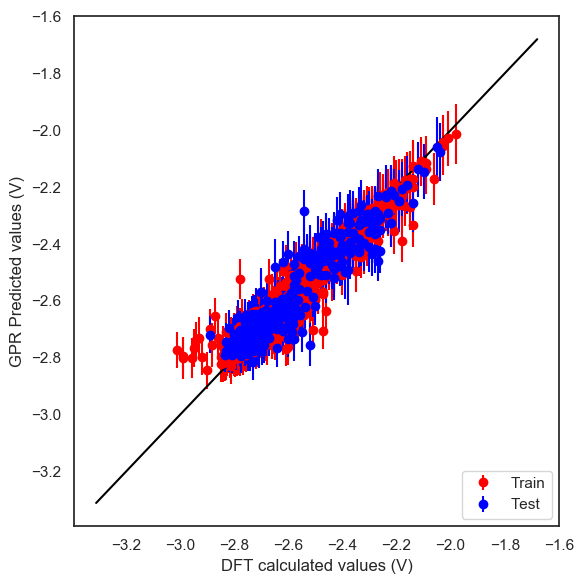

In [76]:
X=Xdata_btz_uncorr_clean
y=ERed_data["Ered_ag"]
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pytorch(X=X,y=y,train_pc=0.8)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

# PCA 

test data is not provided, returning only scaled train data
No. of PC           Cumulative variance                                                             
--------------------------------------------------
1                   0.286537                                                                        
2                   0.417524                                                                        
3                   0.541424                                                                        
4                   0.624283                                                                        
5                   0.694657                                                                        
6                   0.745131                                                                        
7                   0.790761                                                                        
8                   0.830477                                                     

C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


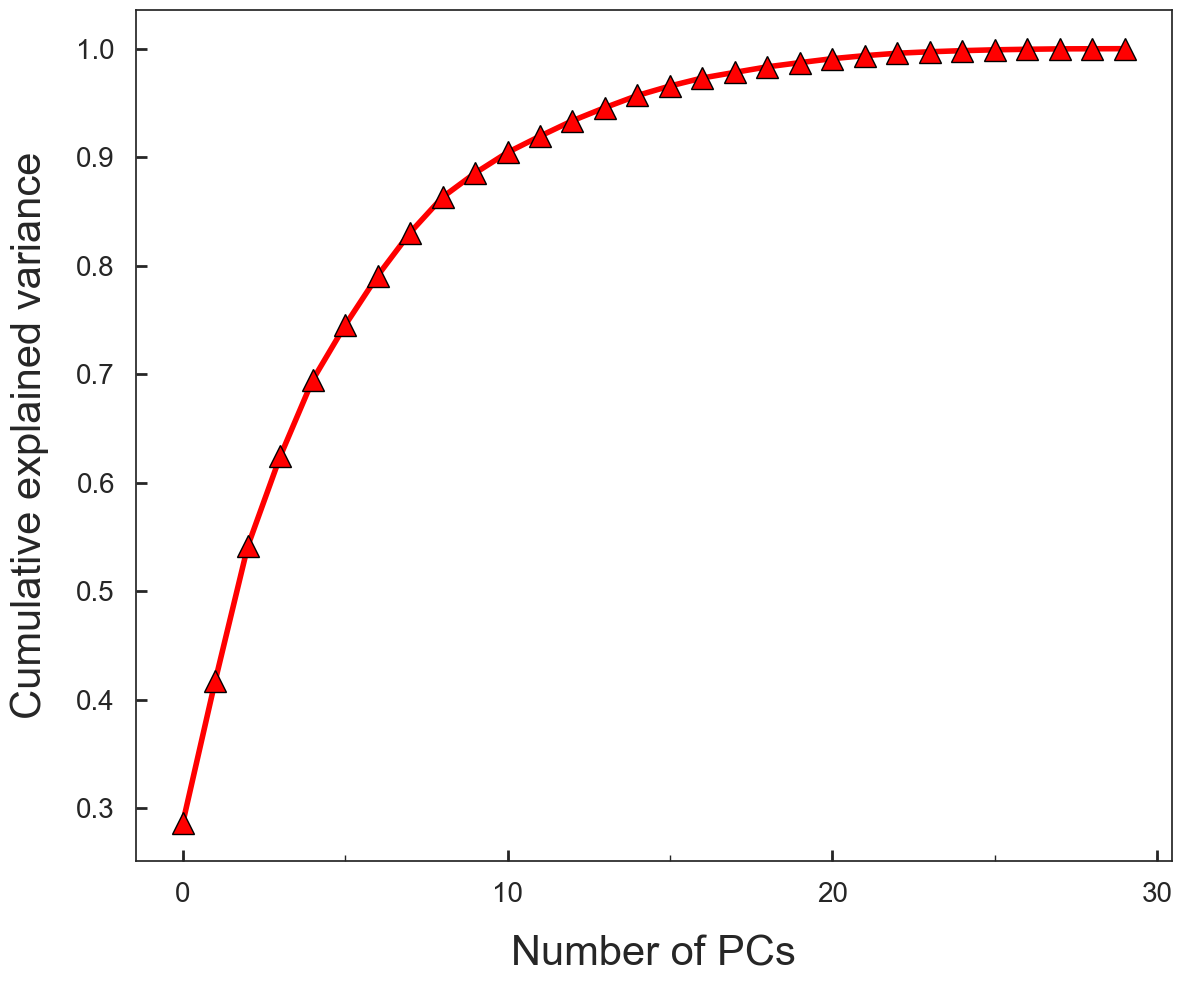

In [54]:
from sklearn.decomposition import PCA # Principle component analysis
import matplotlib.pyplot as plt  
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

X=Xdata_btz_uncorr_clean

X_st= do_scaling(scaler=StandardScaler(),xtrain=X, xtest=None)
pca = PCA().fit(X_st)

#Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting
plt.tight_layout()
# plt.savefig("./Figures/Xdata_reduced_pca.png",dpi=300)
print('{:<20s}{:<80s}'.format('No. of PC','Cumulative variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

# Features

In [55]:
from sklearn.model_selection import KFold

In [56]:
num_PCs = np.arange(8,30,6)
num_PCs

array([ 8, 14, 20, 26])

In [57]:
def gpr_one_pca_pytorch(X,y,train_by_test=0.8,nPC=5,random_state=None):

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_by_test,random_state=random_state) 

    xtrain, xtest = do_scaling(scaler=RobustScaler(),xtrain=X_train, xtest=X_test)
    # PCA
    n_PC = nPC  # Set number of principle components
    pca = PCA(n_components=n_PC)
        
    xtrain = pca.fit_transform(xtrain) 
    xtest=pca.transform(xtest)
    print(f"xtrain.shape={xtrain.shape},xtest.shape={xtest.shape}")
    model, likelihood = gpregression_pytorch(xtrain,y_train,verbose=False)
    
    ypred_test, yerr_test = gprediction_pytorch(model,likelihood,xtest)
    ypred_train, yerr_train = gprediction_pytorch(model,likelihood,xtrain)
    
    return y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train

In [58]:
def helper(X,y,nPC=5,random_state=None):
    y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=nPC,random_state=random_state)
    r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train=plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=False,savefig=False,data=True)
    return r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train

In [59]:
train_score = np.zeros([len(num_PCs),3])
test_score = np.zeros([len(num_PCs),3])

In [60]:
for idx,PCs in enumerate(num_PCs):
    print(f"--> %idx/num_PCs={100*idx/len(num_PCs)}  <--")
    # split train and test datasets
    X=Xdata_btz_uncorr_clean
    y=ERed_data["Ered_ag"]
   
    test_score[idx][0],test_score[idx][1],test_score[idx][2],train_score[idx][0],train_score[idx][1],train_score[idx][2]=helper(X=X,y=y,nPC=PCs,random_state=8)

--> %idx/num_PCs=0.0  <--
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
--> %idx/num_PCs=25.0  <--
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
--> %idx/num_PCs=50.0  <--
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
--> %idx/num_PCs=75.0  <--
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)
(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


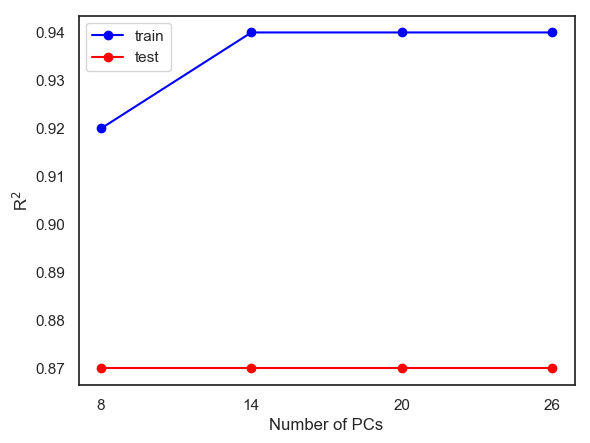

In [61]:
plt.plot(num_PCs,train_score[:,0],"-o",label="train",color="blue")
plt.plot(num_PCs,test_score[:,0],"-o",label="test",color="red")
plt.xlabel("Number of PCs")
plt.ylabel("R$^2$")
plt.legend()
plt.xticks(num_PCs)
plt.show()

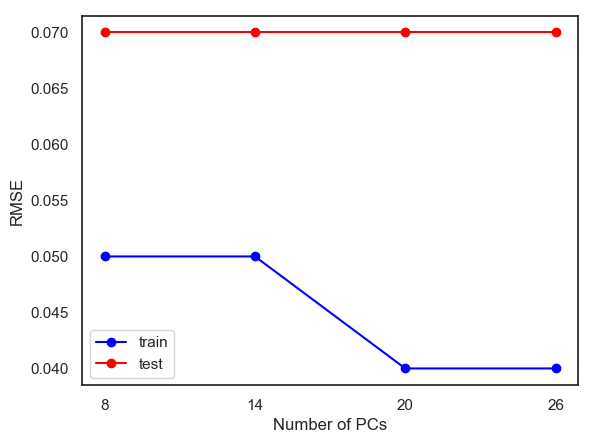

In [62]:
plt.plot(num_PCs,train_score[:,1],"-o",label="train",color="blue")
plt.plot(num_PCs,test_score[:,1],"-o",label="test",color="red")
plt.xlabel("Number of PCs")
plt.ylabel("RMSE")
plt.legend()
plt.xticks(num_PCs)
plt.show()

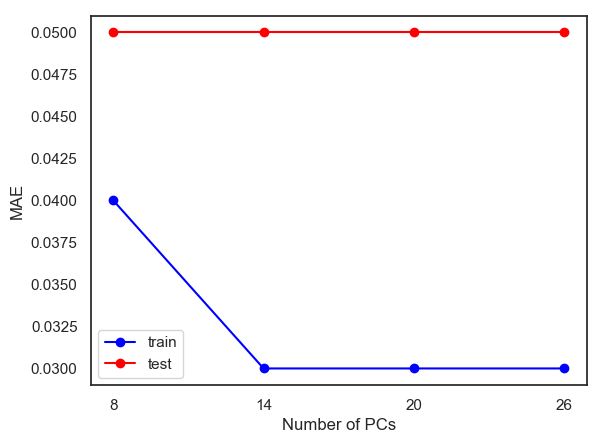

In [63]:
plt.plot(num_PCs,train_score[:,2],"-o",label="train",color="blue")
plt.plot(num_PCs,test_score[:,2],"-o",label="test",color="red")
plt.xlabel("Number of PCs")
plt.ylabel("MAE")
plt.legend()
plt.xticks(num_PCs)
plt.show()

Repeat 10 times

In [64]:
avg_train_score = np.zeros([len(num_PCs),3])
avg_test_score = np.zeros([len(num_PCs),3])

std_train_score = np.zeros([len(num_PCs),3])
std_test_score = np.zeros([len(num_PCs),3])

In [65]:
for idx,PCs in enumerate(num_PCs):
    print(f"--> %idx/num_PCs={100*idx/len(num_PCs)}  <--")
    # split train and test datasets
    X=Xdata_btz_uncorr_clean
    y=ERed_data["Ered_ag"]
    
    repeats=10
    r2_train,rmse_train,mae_train=np.zeros(repeats),np.zeros(repeats),np.zeros(repeats)
    r2_test,rmse_test,mae_test=np.zeros(repeats),np.zeros(repeats),np.zeros(repeats)

    for j in np.arange(repeats):
        print(f" ---> %repeat <-- ={100*j/repeats}")
        r2_test[j],rmse_test[j],mae_test[j],r2_train[j],rmse_train[j],mae_train[j]=helper(X=X,y=y,nPC=PCs)

    avg_test_score[idx] = r2_test.mean(),rmse_test.mean(),mae_test.mean()
    avg_train_score[idx] = r2_train.mean(),rmse_train.mean(),mae_train.mean()
    std_test_score[idx] = r2_test.std(),rmse_test.std(),mae_test.std()
    std_train_score[idx] = r2_train.std(),rmse_train.std(),mae_train.std()
    

--> %idx/num_PCs=0.0  <--
 ---> %repeat <-- =0.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.81, RMSE = 0.08, MAE = 0.05)
 ---> %repeat <-- =10.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.84, RMSE = 0.08, MAE = 0.05)
 ---> %repeat <-- =20.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.83, RMSE = 0.08, MAE = 0.05)
 ---> %repeat <-- =30.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =40.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.89, RMSE = 0.06, MAE = 0.04)
 ---> %repeat <-- =50.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.85, RMSE = 0.08, MAE = 0.05)
 ---> %repeat <-- =60.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =70.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =80.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =90.0
returning scaled train and test data
xtrain.shape=(1200, 8),xtest.shape=(300, 8)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)
--> %idx/num_PCs=25.0  <--
 ---> %repeat <-- =0.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =10.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
 ---> %repeat <-- =20.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =30.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =40.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
 ---> %repeat <-- =50.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
 ---> %repeat <-- =60.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =70.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =80.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =90.0
returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
--> %idx/num_PCs=50.0  <--
 ---> %repeat <-- =0.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.95, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.84, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =10.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.83, RMSE = 0.08, MAE = 0.05)
 ---> %repeat <-- =20.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =30.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.84, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =40.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =50.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =60.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =70.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.89, RMSE = 0.06, MAE = 0.05)
 ---> %repeat <-- =80.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =90.0
returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.83, RMSE = 0.07, MAE = 0.05)
--> %idx/num_PCs=75.0  <--
 ---> %repeat <-- =0.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =10.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =20.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
 ---> %repeat <-- =30.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.89, RMSE = 0.06, MAE = 0.04)
 ---> %repeat <-- =40.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =50.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =60.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =70.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.95, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =80.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.95, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.87, RMSE = 0.07, MAE = 0.05)
 ---> %repeat <-- =90.0
returning scaled train and test data
xtrain.shape=(1200, 26),xtest.shape=(300, 26)
(Train: R2 = 0.94, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.86, RMSE = 0.07, MAE = 0.05)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


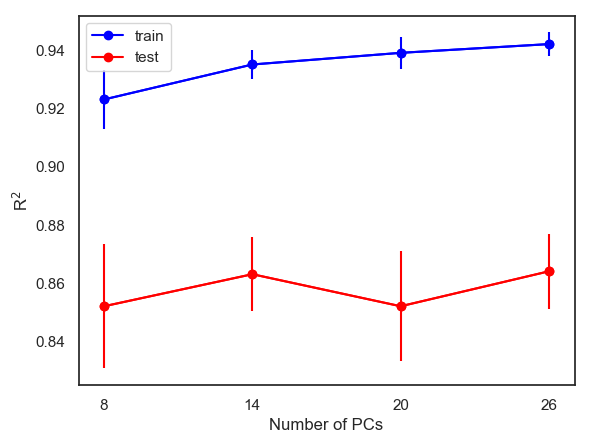

In [66]:
plt.plot(num_PCs,avg_train_score[:,0],"-o",label="train",color="blue")
plt.plot(num_PCs,avg_test_score[:,0],"-o",label="test",color="red")

plt.scatter(num_PCs,avg_train_score[:,0],color="blue")
plt.scatter(num_PCs,avg_test_score[:,0],color="red")

plt.errorbar(num_PCs,avg_train_score[:,0],yerr=std_train_score[:,0],color="blue")
plt.errorbar(num_PCs,avg_test_score[:,0],yerr=std_test_score[:,0],color="red")

plt.xlabel("Number of PCs")
plt.ylabel("R$^2$")
plt.legend()
plt.xticks(num_PCs)
plt.show()

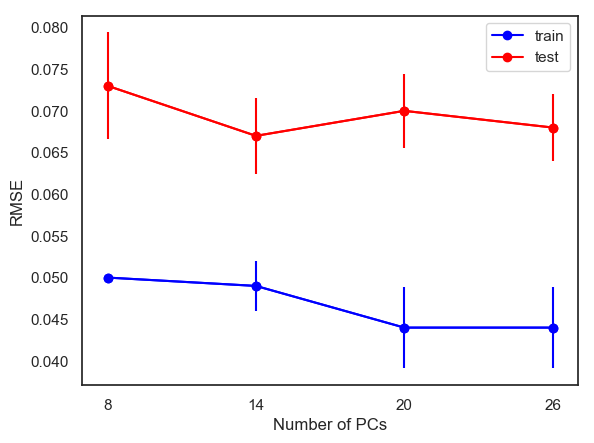

In [67]:
plt.plot(num_PCs,avg_train_score[:,1],"-o",label="train",color="blue")
plt.plot(num_PCs,avg_test_score[:,1],"-o",label="test",color="red")

plt.scatter(num_PCs,avg_train_score[:,1],color="blue")
plt.scatter(num_PCs,avg_test_score[:,1],color="red")

plt.errorbar(num_PCs,avg_train_score[:,1],yerr=std_train_score[:,1],color="blue")
plt.errorbar(num_PCs,avg_test_score[:,1],yerr=std_test_score[:,1],color="red")

plt.xlabel("Number of PCs")
plt.ylabel("RMSE")
plt.legend()
plt.xticks(num_PCs)
plt.show()

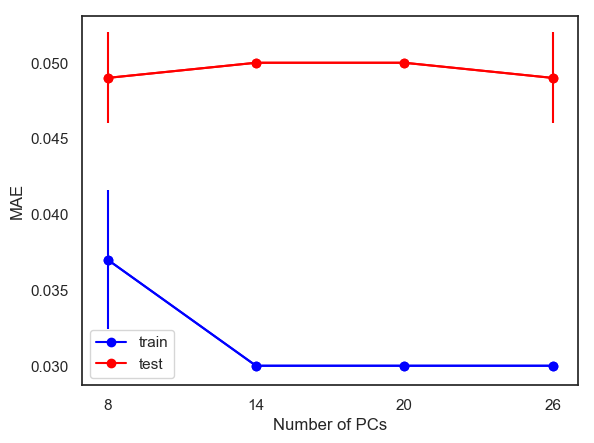

In [68]:
plt.plot(num_PCs,avg_train_score[:,2],"-o",label="train",color="blue")
plt.plot(num_PCs,avg_test_score[:,2],"-o",label="test",color="red")

plt.scatter(num_PCs,avg_train_score[:,2],color="blue")
plt.scatter(num_PCs,avg_test_score[:,2],color="red")

plt.errorbar(num_PCs,avg_train_score[:,2],yerr=std_train_score[:,2],color="blue")
plt.errorbar(num_PCs,avg_test_score[:,2],yerr=std_test_score[:,2],color="red")

plt.xlabel("Number of PCs")
plt.ylabel("MAE")
plt.legend()
plt.xticks(num_PCs)
plt.show()

# Use 14 PCs

returning scaled train and test data
xtrain.shape=(1200, 14),xtest.shape=(300, 14)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
(Test:  R2 = 0.88, RMSE = 0.06, MAE = 0.05)
Train: min error = 0.06 max_err 0.12
Test: min error = 0.06 max_err 0.11


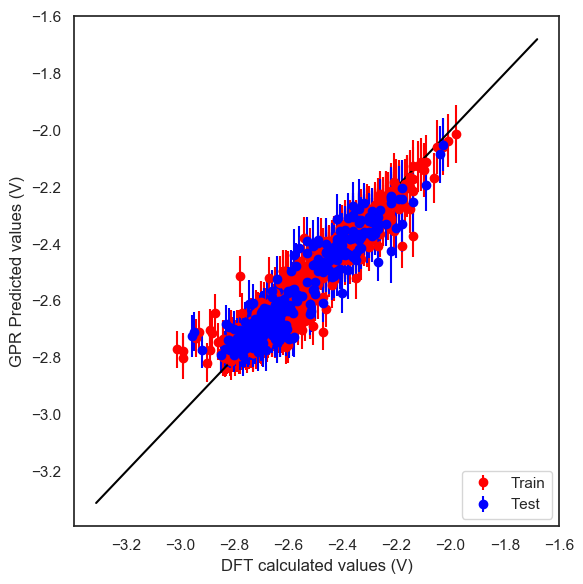

In [74]:
X=Xdata_btz_uncorr_clean
y=ERed_data["Ered_ag"]
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=14)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

# Use 21 PCs

returning scaled train and test data
xtrain.shape=(1200, 20),xtest.shape=(300, 20)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.85, RMSE = 0.07, MAE = 0.05)
Train: min error = 0.06 max_err 0.13
Test: min error = 0.06 max_err 0.11


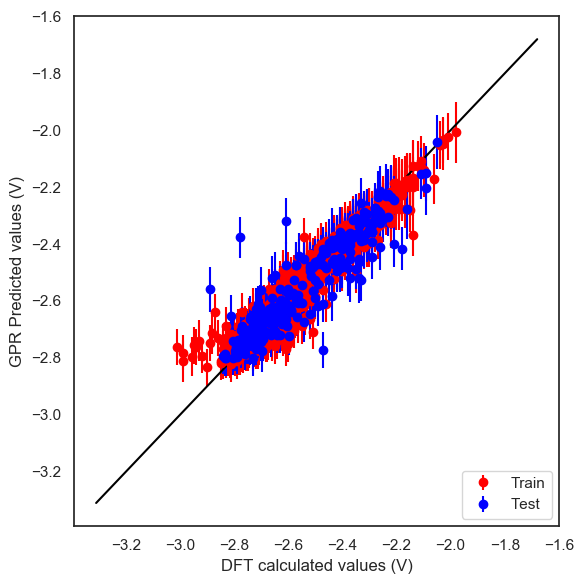

In [73]:
X=Xdata_btz_uncorr_clean
y=ERed_data["Ered_ag"]
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=20)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)

# 30 PCs

returning scaled train and test data
xtrain.shape=(1200, 30),xtest.shape=(300, 30)


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
(Test:  R2 = 0.87, RMSE = 0.06, MAE = 0.05)
Train: min error = 0.06 max_err 0.13
Test: min error = 0.06 max_err 0.12


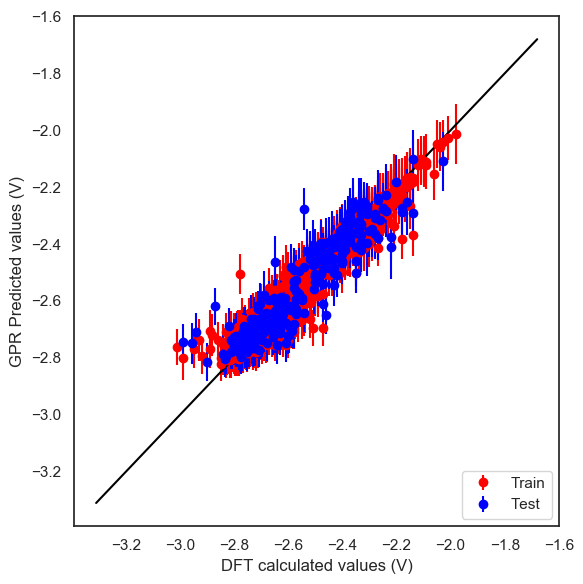

In [75]:
X=Xdata_btz_uncorr_clean
y=ERed_data["Ered_ag"]
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_by_test=0.8,nPC=30)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=False,data=False)